# Plotting stats for cFOS whole-brain data sample


The following notebokk details how to generate plots from cell statistics data.

## Load data

In [19]:
from pathlib import Path
import sys
sys.path.append("../..")
from napari_cellseg3d.code_models.instance_segmentation import volume_stats
from tifffile import imread

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd

In [ ]:
path = Path.home() / "Desktop/Code/CELLSEG_BENCHMARK//RESULTS/WNET OTHERS/Seb cFOS"
labels = imread(path / "instance_labels_test.tif")


0 invalid sphericities were set to NaN. This occurs for objects with a volume of 1 pixel.


## Compute statistics

In [ ]:
stats = volume_stats(labels)
stats_df = pd.DataFrame(stats.get_dict())

In [25]:
stats_df

Volume  Centroid x  ...  Filling ratio  Number objects
0         5   42.800000  ...       0.018763             983
1        26    8.153846  ...                               
2         9    5.000000  ...                               
3        31   41.290323  ...                               
4         4    7.500000  ...                               
..      ...         ...  ...            ...             ...
978      12   33.916667  ...                               
979       7   22.000000  ...                               
980      21   51.047619  ...                               
981       4   18.500000  ...                               
982      28   19.071429  ...                               

[983 rows x 10 columns]

In [40]:
stats_df["Number objects"].values[0]

983

### Plottting data

#### Static version

In [44]:
def plot_data(data, x_inv=False, y_inv=False, z_inv=False):
    data_nona = data.dropna()
    x = data["Centroid x"].values
    y = data["Centroid y"].values
    z = data["Centroid z"].values

    x = np.floor(x)
    y = np.floor(y)
    z = np.floor(z)

    maxsph = max(data_nona["Sphericity (axes)"])
    minsph = min(data_nona["Sphericity (axes)"])

    cmap = cm.jet.reversed()
    norm = Normalize(minsph, maxsph)
    col = [cmap(norm(sph)) for sph in data["Sphericity (axes)"]]

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(projection="3d")

    scatter = ax.scatter(x, y, z, marker="o", c=col, s=data["Volume"])
    fig.colorbar(
        cm.ScalarMappable(norm=norm, cmap=cmap), shrink=0.5, label="Sphericity"
    )

    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    legend2 = ax.legend(
        handles, labels, loc="center left", title="Volume", labelspacing=1.7
    )

    ax.set_title(
        f"Cell location from centroids\nTotal number of cells : {int(data['Number objects'].values[0])}",
        fontdict={"fontsize": 18},
    )
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    if x_inv:
        ax.invert_xaxis()
    if y_inv:
        ax.invert_yaxis()
    if z_inv:
        ax.invert_zaxis()

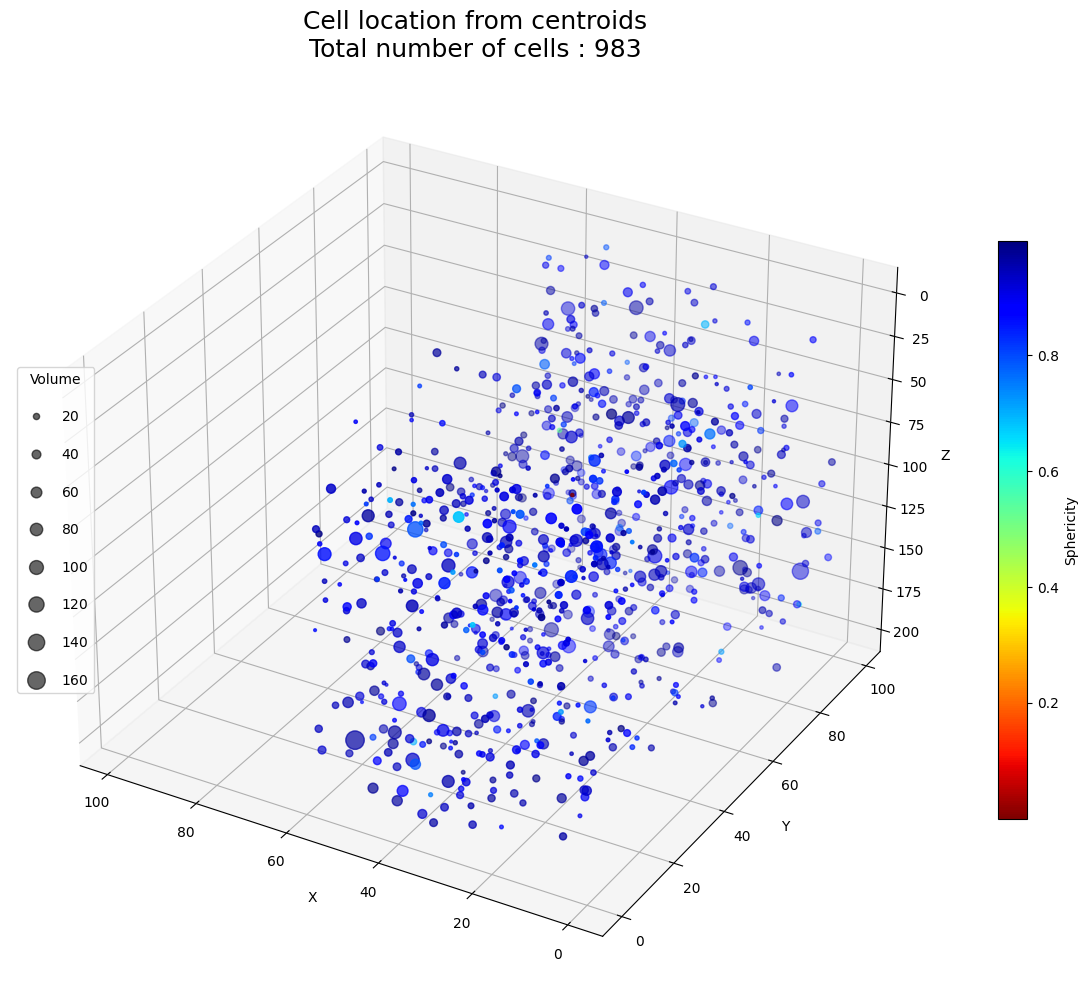

In [45]:
plot_data(stats_df, x_inv=True, y_inv=True, z_inv=True)

#### Interactive version

* Plotly library ``pip install plotly``
* Installation of jupyter extensions, see [Getting started](https://plotly.com/python/getting-started/#jupyterlab-support) > Jupyter Lab support

In [28]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

In [29]:
def plotly_cells_stats(data):
    init_notebook_mode()  # initiate notebook for offline plot

    x = data["Centroid x"]
    y = data["Centroid y"]
    z = data["Centroid z"]

    fig = go.Figure(
        data=go.Scatter3d(
            x=np.floor(x),
            y=np.floor(y),
            z=np.floor(z),
            mode="markers",
            marker=dict(
                sizemode="diameter",
                sizeref=30,
                sizemin=20,
                size=data["Volume"],
                color=data["Sphericity (axes)"],
                colorscale="Turbo_r",
                colorbar_title="Sphericity",
                line_color="rgb(140, 140, 170)",
            ),
        )
    )

    fig.update_layout(
        height=800,
        width=800,
        title=f'Total number of cells : {int(data["Number objects"][0])}',
    )

    fig.show()

In [30]:
plotly_cells_stats(stats_df)